# Part 1

In [1]:
## importing the python libaries required
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import seaborn as sns



### Importing Data, EDA and Data Manipulation

In [2]:
##Data is imported as dataframe
df=pd.read_csv('us-states.csv')

In [3]:
##Filtering out California
df_cali=df[df['state']=='California']
N_total = 39664128
df_cali.reset_index(inplace=True,drop=True)

In [4]:
####Calculation of Recovered, Susceptible from the data
df_cali.loc[:,'recovered']= df_cali.sort_values(by='date')['cases'].shift(14)
df_cali.loc[:,'recovered'].fillna(0, inplace=True)
df_cali.loc[:,'susceptible'] = N_total - df_cali.loc[:,'recovered']-df_cali.loc[:,'deaths']
df_cali.loc[:,'infected'] = df_cali.loc[:,'cases'] - df_cali.loc[:,'recovered']

C:\Anamika\Python\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Anamika\Python\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
C:\Anamika\Python\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

Text(0.5, 1.0, 'Cases in California')

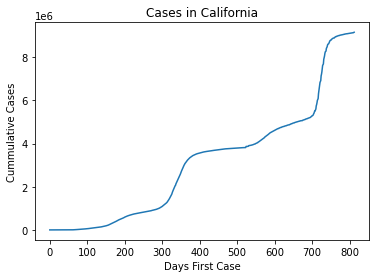

In [5]:
##Trend of cummulative cases
date= np.linspace(0, 812,812)
plt.plot(date,df_cali['cases'])
plt.xlabel("Days First Case")
plt.ylabel("Cummulative Cases")
plt.title("Cases in California")


Text(0.5, 1.0, 'California')

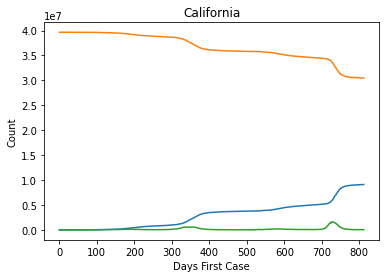

In [6]:
##overall trend of S,I,R
date= np.linspace(0, 812,812)
plt.plot(date,df_cali['recovered'])
plt.plot(date,df_cali['susceptible'])
plt.plot(date,df_cali['infected'])
plt.xlabel("Days First Case")
plt.ylabel("Count")
plt.title("California")

Text(0.5, 1.0, 'California')

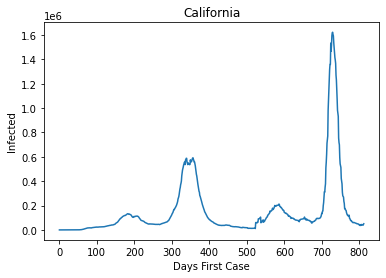

In [7]:
## Trend to see how I is changing to calibrate the values of 
date= np.linspace(0, 812,812)
plt.plot(date,df_cali['infected'])
plt.xlabel("Days First Case")
plt.ylabel("Infected")
plt.title("California")


### SIR Model

In [8]:
##Intializing values for SIR Model
I0, R0 = 1, 0
N_total = 39664128
N=N_total
S0 = N - R0
gamma = 1./14
t = np.linspace(0, len(df_cali)-1, len(df_cali))
k=0.1
epochs = [0, 100, 200, 300, 400, 500, 600,720]
x = [50, 180, 265, 345, 475, 570, 687, 720]
R_0 = [2.2, 1.88, 0.56, 1.83, 0.45, 1.66, 0.92, 3, 0.01]

In [9]:
##Derivative function for SIR model
def deriv_dynamic(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta(t) * S * I / N
    dIdt = beta(t) * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [10]:
##Function to calculate the beta value using smooth transition in R0
def R_0_dynamic(t):
    value = None
    for i in range(len(epochs)):
        if t >= epochs[i]:
            value = logistic_R_0(t, k, x[i], R_0[i],  R_0[i+1])
    return value

def logistic_R_0(t, k, x, start, end):
    return (start - end) / (1 + np.exp(-k * (-t + x))) + end

def beta_dynamic(t):
    return R_0_dynamic(t) * gamma

In [11]:
##Function to calculate the RMS error
def rms(a,b):
    z=a-b
    e=np.sqrt(np.sum(np.square(a-b)/len(z)))
    return e
             

In [12]:
##Function to calculate the absolute error
def eabs(a,b):
    z=a-b
    e=np.sum(np.abs(II-I)/len(z))
    return e

In [13]:
##Calling the SIR model
y0 = S0, I0, R0
ret = odeint(deriv_dynamic, y0, t, args = (N, beta_dynamic, gamma))
S, I, R = ret.T


### Results from the SIR model and Errors

In [14]:
##Printing the RMS and Absolute error
II=np.array(df_cali['infected'])
print("RMS ERROR:",rms(II,I))
print('Absolute Error:',eabs(II,I))

RMS ERROR: 41063.543421745744
Absolute Error: 27475.785876485825


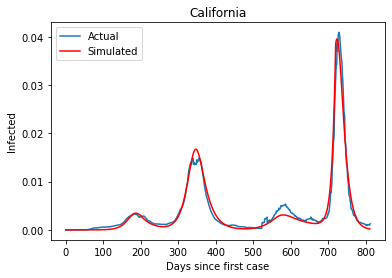

In [15]:
## Plot
date= np.linspace(0, 812,812)
plt.plot(date,df_cali['infected']/N,label="Actual")
plt.plot(t, I/N,label="Simulated",color='r')
plt.xlabel("Days since first case")
plt.ylabel("Infected")
plt.title("California")

plt.legend()


Text(0.5, 1.0, 'Susceptible in California')

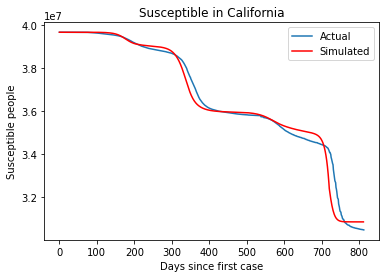

In [16]:
plt.plot(date,df_cali['susceptible'],label="Actual")
plt.plot(t, S,label="Simulated",color='r')
plt.legend()
plt.xlabel("Days since first case")
plt.ylabel("Susceptible people")
plt.title("Susceptible in California")

Text(0.5, 1.0, 'Recovered in California')

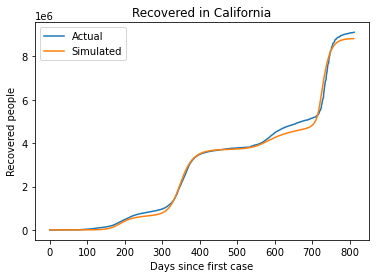

In [17]:
plt.plot(date,df_cali['recovered'],label="Actual")
plt.plot(t, R,label="Simulated")
plt.legend()
plt.xlabel("Days since first case")
plt.ylabel("Recovered people")
plt.title("Recovered in California")

# Part 2

### Loading Data 

In [18]:
##Loading 2 years of data as a dataframe
df2020=pd.read_csv('data_download_file_reference_2020.csv')
df2021=pd.read_csv('data_download_file_reference_2021.csv')
df2022=pd.read_csv('data_download_file_reference_2022.csv')

In [19]:
##Creating a master dataframe containing all 3 years of data
df20_21=df2020.append(df2021)
df_covid=df20_21.append(df2022)

In [20]:
##Retriving the columns required.
df_covid=df_covid.loc[:,['date','location_name','daily_deaths','cumulative_deaths', 'daily_cases','daily_deaths',
               'cumulative_cases', 'cumulative_hospitalizations','population','mobility_mean', 
               'testing_mean','pneumonia_mean','mask_use_mean','cumulative_all_vaccinated', 'cumulative_all_fully_vaccinated',
       'cumulative_all_effectively_vaccinated']]

In [21]:
##Retriving values for California 
df_covid_cali=df_covid[df_covid['location_name'] == 'California']
df_covid_cali.reset_index(inplace=True,drop=True)

In [22]:
##Using the values of our R0 from SIR model we are calculating our dynamic R0 for all t
t_new = np.linspace(0, len(df_covid_cali)-1, len(df_covid_cali))
k=0.1
epochs = [0, 100, 200, 300, 400, 500, 600,720]
x = [50, 180, 265, 345, 475, 570, 687, 720]
R_0 = [2.2, 1.88, 0.56, 1.83, 0.45, 1.66, 0.92, 3, 0.01]
r_0_finals=[]
for i in t_new:
    r_0_finals.append(R_0_dynamic(i))
    

Text(0.5, 1.0, 'Mask vs Reproduction Number-California')

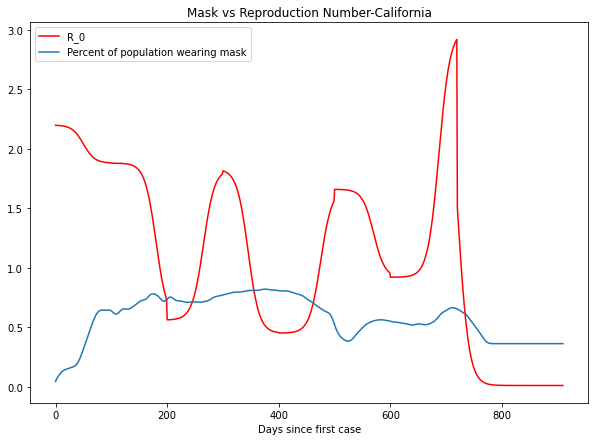

In [23]:
## Comparing masking with R0
plt.figure(figsize=(10, 7))
plt.plot(t_new,r_0_finals,label='R_0',color='r')
plt.plot(t_new,df_covid_cali['mask_use_mean'],label='Percent of population wearing mask')
plt.legend()
plt.xlabel("Days since first case")
plt.title("Mask vs Reproduction Number-California")

Text(0.5, 1.0, 'Mask vs Infection')

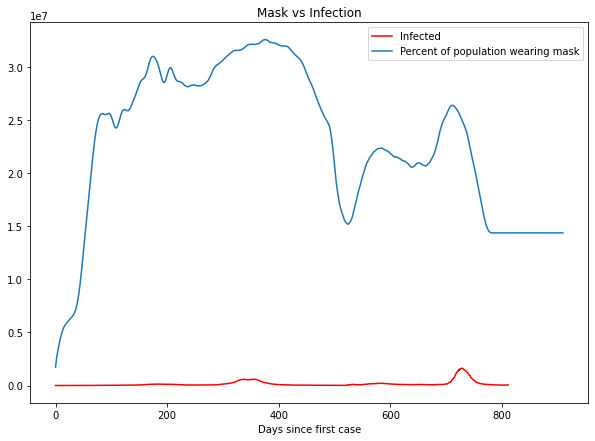

In [24]:
## Comparing masking with infected
plt.figure(figsize=(10, 7))
plt.plot(t,df_cali['infected'],label='Infected',color='r')
plt.plot(t_new,df_covid_cali['mask_use_mean']*N_total,label='Percent of population wearing mask')
plt.legend()
plt.xlabel("Days since first case")
plt.title("Mask vs Infection")

Text(0.5, 1.0, 'Vaccination vs Reproduction Number California')

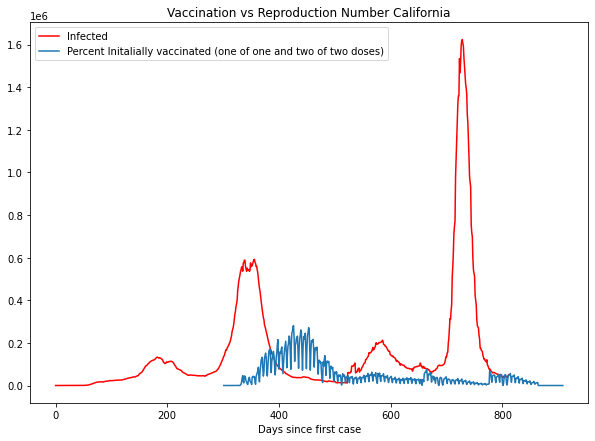

In [25]:
##Calculating daily vaccination and its trend with infected
new_vacc=[]
for i in range(1,len(df_covid_cali['cumulative_all_fully_vaccinated'])):
    new_vacc.append(df_covid_cali['cumulative_all_fully_vaccinated'][i]-df_covid_cali['cumulative_all_fully_vaccinated'][i-1])
plt.figure(figsize=(10, 7))
t_new1 = np.linspace(0, len(new_vacc)-1, len(new_vacc))
plt.plot(t,df_cali['infected'],label='Infected',color='r')
plt.plot(t_new1,np.array(new_vacc),label='Percent Initalially vaccinated (one of one and two of two doses)')
plt.legend()

plt.xlabel("Days since first case")
plt.title("Vaccination vs Reproduction Number California")

Text(0.5, 1.0, 'Vaccination vs Reproduction Number')

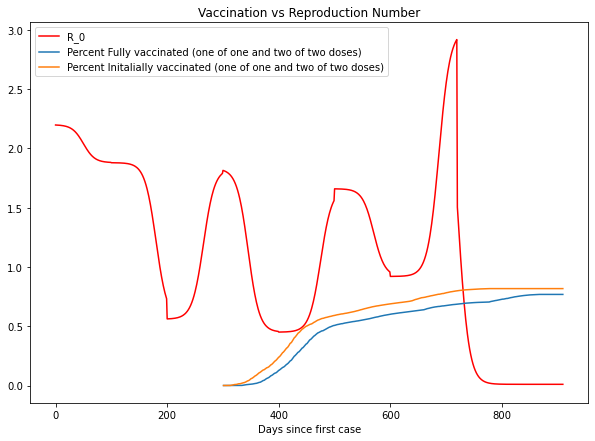

In [26]:
##Cummulative Vaccination with R0
plt.figure(figsize=(10, 7))
plt.plot(t_new,r_0_finals,label='R_0',color='r')
plt.plot(t_new,df_covid_cali['cumulative_all_fully_vaccinated']/df_covid_cali['population'],label='Percent Fully vaccinated (one of one and two of two doses)')
plt.plot(t_new,df_covid_cali['cumulative_all_vaccinated']/df_covid_cali['population'],label='Percent Initalially vaccinated (one of one and two of two doses)')
plt.legend()

plt.xlabel("Days since first case")
plt.title("Vaccination vs Reproduction Number")

Text(0.5, 1.0, 'Vaccination vs Cummulative cases')

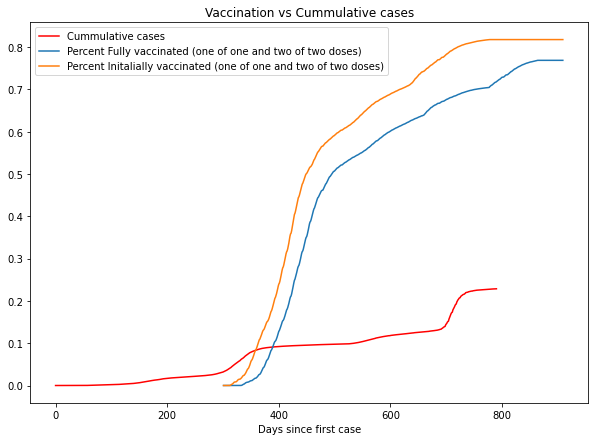

In [27]:
##Cummulative Vaccination with infection
plt.figure(figsize=(10, 7))
plt.plot(t_new,df_covid_cali['cumulative_cases']/df_covid_cali['population'],label='Cummulative cases',color='r')
plt.plot(t_new,df_covid_cali['cumulative_all_fully_vaccinated']/df_covid_cali['population'],label='Percent Fully vaccinated (one of one and two of two doses)')
plt.plot(t_new,df_covid_cali['cumulative_all_vaccinated']/df_covid_cali['population'],label='Percent Initalially vaccinated (one of one and two of two doses)')
plt.legend()
plt.xlabel("Days since first case")
plt.title("Vaccination vs Cummulative cases")

Text(0.5, 1.0, '%Change in Mobility  vs Reproduction Number- California')

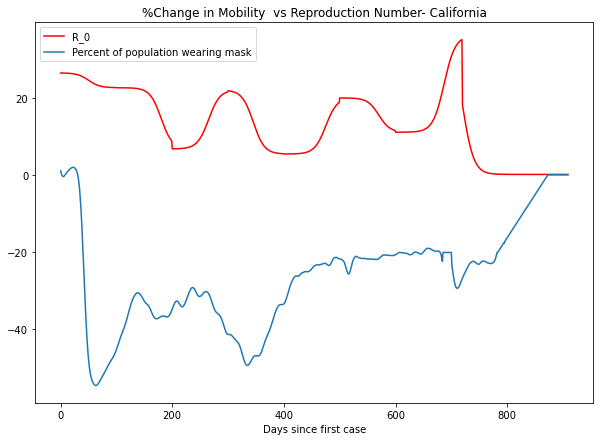

In [28]:
##Comparing mobility with R0
r_0_scale=[12 * r for r in r_0_finals]
plt.figure(figsize=(10, 7))
plt.plot(t_new,r_0_scale,label='R_0',color='r')
plt.plot(t_new,df_covid_cali['mobility_mean'],label='Percent of population wearing mask')
plt.legend()
plt.xlabel("Days since first case")
plt.title("%Change in Mobility  vs Reproduction Number- California")

Text(0.5, 1.0, 'Testing-California')

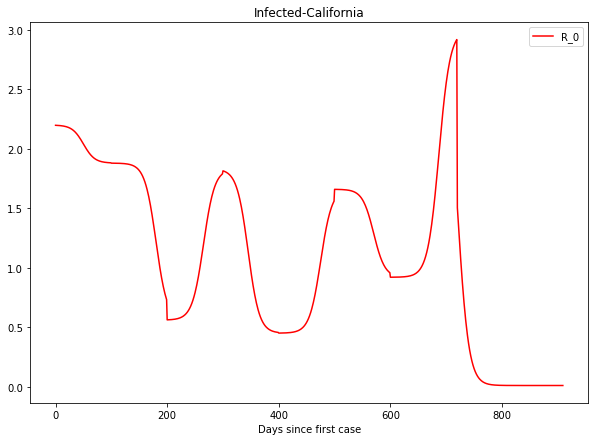

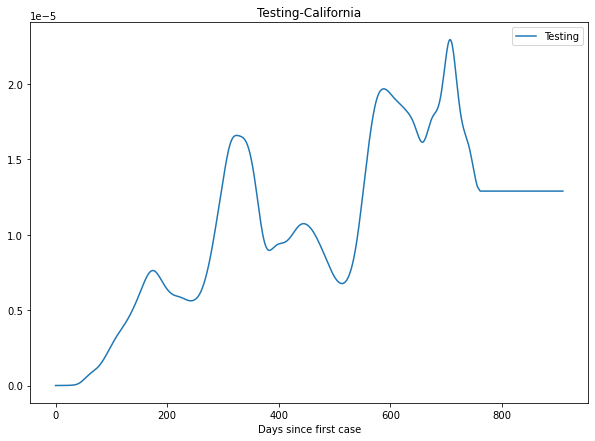

In [29]:
##Comparing R0 and testing
plt.figure(figsize=(10, 7))
plt.plot(t_new,r_0_finals,label='R_0',color='r')
plt.legend()
plt.xlabel("Days since first case")
plt.title("Infected-California")
plt.figure(figsize=(10, 7))
plt.plot(t_new,df_covid_cali['testing_mean']/df_covid_cali['population'],label='Testing')
plt.legend()
plt.xlabel("Days since first case")
plt.title("Testing-California")

Text(0.5, 1.0, 'Testing')

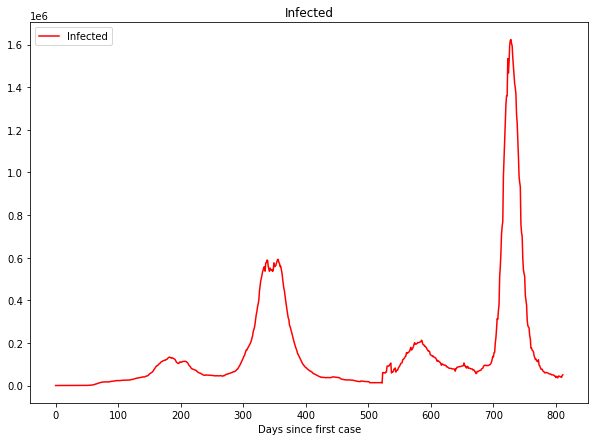

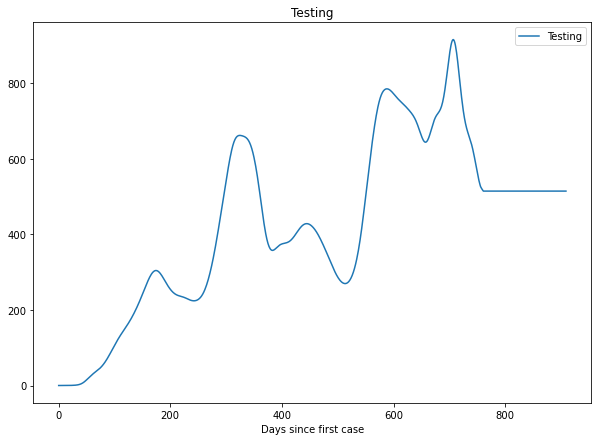

In [30]:
##Comparing testing and infected people
plt.figure(figsize=(10, 7))
plt.plot(t,df_cali['infected'],label='Infected',color='r')
plt.legend()
plt.xlabel("Days since first case")
plt.title("Infected")
plt.figure(figsize=(10, 7))
plt.plot(t_new,df_covid_cali['testing_mean'],label='Testing')
plt.legend()
plt.xlabel("Days since first case")
plt.title("Testing")

### Trial values of R_0 and e

epochs = [0, 100, 200, 300, 400, 500, 600, 700,730]
R_0 = [2.2, 1.88, 0.56, 1.83, 0.47, 1.65, 0.95,2.1,3.1, 0.01]
k=0.1
x = [50, 180, 265, 345, 475, 570, 687,710, 720]
87714.96592664944
39212.12459314209
epochs = [0, 100, 200, 300, 400, 500, 600, 700,730]
R_0 = [2.2, 1.88, 0.56, 1.83, 0.48, 1.65, 0.95,2.1,3.1, 0.01]
k=0.1
x = [50, 180, 265, 345, 475, 570, 687,710, 720]
87461.97980607442
39216.86094341095
epochs = [0, 100, 200, 300, 400, 500,550, 600, 700,730]


epochs = [0, 100, 200, 300, 400, 500, 600, 700,730]
R_0 = [2.2, 1.88, 0.56, 1.83, 0.48, 1.66, 0.95,2.07,3.1, 0.01]
k=0.1
x = [50, 180, 265, 345, 475, 570, 687,710, 720]
86379.54814630013
38230.63569705547
R_0 = [2.2, 1.88, 0.56, 1.83, 0.48, 1.66,1.21, 0.95,2.07,3.1, 0.01]
k=0.1
x = [50, 180, 265, 345, 475, 570,600, 687,710, 720]
91430.84546135813
39000.14328051098

R_0 = [2.2, 1.88, 0.56, 1.83, 0.45, 1.69, 0.92, 3, 0.01]
49739.017488843565
27751.934553269286
R_0 = [2.2, 1.88, 0.56, 1.83, 0.45, 1.66, 0.92, 3, 0.01]
41063.543421745744
27475.785876485825
R_0 = [2.2, 1.88, 0.56, 1.83, 0.45, 1.66, 0.92, 3, 0.06]
41145.033175094104
27835.503468593924
R_0 = [2.2, 1.88, 0.56, 1.83, 0.45, 1.69, 1, 2.7, 0.01]
55325.64478879226
31112.042517751273